In [63]:
import numpy as np

x1 = np.random.random((5,1)).reshape((-1,1))
y1 = np.random.random((5,1)).reshape((-1,1))#np.sin(x1) * x1

x2 = np.linspace(0,1,1000).reshape((-1,1));

sigma = 0.1
llambda = 0

def kernel(x,y,sigma,llambda):
    k = np.exp(-(x - y)**2 / (2*sigma**2))
    k = k + np.eye(k.shape[0],k.shape[1]) * llambda
    return k

def gaussian_process(x2,x1,y1,sigma,llambda):
    k11 = kernel(x1,x1.T,sigma,llambda)
    k12 = kernel(x1,x2.T,sigma,llambda)
    k22 = kernel(x2,x2.T,sigma,llambda)

    k11i = np.linalg.inv(k11)
    y2 = k12.T @ k11i @ y1
    sig2 = k22 - k12.T @ k11i @ k12
    return y2, sig2

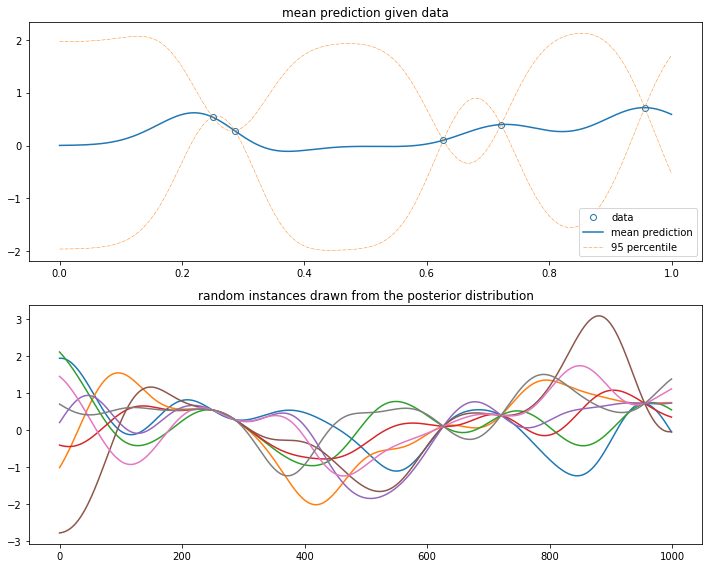

In [64]:
sigma = 0.07
y2,sig2 = gaussian_process(x2,x1,y1,sigma,llambda)
y2 = np.squeeze(y2)
instances8 = np.random.multivariate_normal(y2,sig2,8)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(x1,y1,
        'o',mfc='None',c='C0',label='data')
plt.plot(x2,y2,
        '-',c='C0',label='mean prediction')
std2 = 1.96 * np.sqrt(np.abs(np.diag(sig2)))
plt.plot(x2,y2-std2,
        '-.',c='C1',linewidth=0.5,label='95 percentile')
plt.plot(x2,y2+std2
        ,'-.',c='C1',linewidth=0.5)
plt.legend(); plt.title('mean prediction given data')

plt.subplot(212)
plt.plot(instances8.T)
plt.title('random instances drawn from the posterior distribution')

plt.tight_layout()
#plt.show()
plt.savefig('mean.png')